In [42]:
#########################
## KZTIHT for Tensors  ##
#########################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import rand, randn, choice, permutation
from scipy.linalg import hadamard

import torch
import torch.nn.functional as F

import tensorly as tl
from tensorly import decomposition
from tensorly.decomposition import parafac
from scipy import linalg

In [43]:
%run KZTIHT_Functions.ipynb

### KZTIHT vs. TIHT Recovery using Gaussian mx. for fixed target dimension varying rank

In [6]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Step-size = 1

cols = []
data = []
itr = 150
num_samples = 20
j = 0
n = 1000
n_dim = [10,10,10]
m = 600

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):
        
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 
data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/KZTIHT_vs_TIHT_err.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


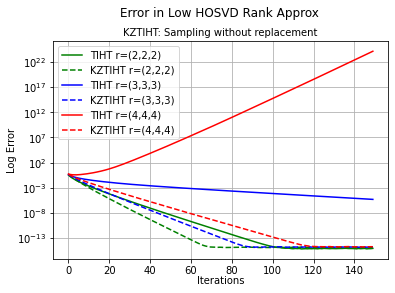

In [11]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/KZTIHT_vs_TIHT_err.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "KZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "KZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "KZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx"
subtitle_string = "KZTIHT: Sampling without replacement"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/KZIHT VS. TIHT_new.png', dpi=300,  bbox_inches="tight")

In [9]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Step-size = 1

cols = []
data = []
itr = 150
num_samples = 20
j = 0
n = 1000
n_dim = [10,10,10]
m = 600

mu_1 = [0.9,0.8,0.8]
mu_2 = [1.3,1.2,1.2]
k=0

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):
        
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu_2[k]*n/m, itr = itr)
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 
    k = k+1

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/KZTIHT_vs_TIHT_err_step.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


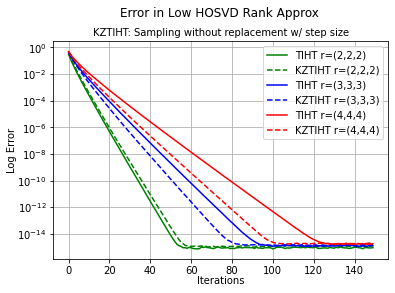

In [4]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/KZTIHT_vs_TIHT_err_step.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

itr = 150
plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "KZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "KZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "KZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx"
subtitle_string = "KZTIHT: Sampling without replacement w/ step size"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/Step KZTIHT VS TIHT.png', dpi=300,  bbox_inches="tight")

### KZTIHT vs. TIHT Recovery using Gaussian mx. for fixed rank and varying target dimension

In [23]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Percentage Recovered

cols = []
data = []

itr = 500
num_samples = 100
j = 0

n = 1000
n_dim = [10,10,10]
r = [3,3,3]

for m in [300,350,400,450,500]:
    
    rec_IHT = 0
    rec_KZIHT = 0
    cols = cols + ['iht'+str(m), 'kziht'+str(m)]
    print(m)
        
    for samples in range(num_samples):
        
        #print(samples)
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = n/m, itr = itr)
        
        if np.linalg.norm(A@(vectorize_tl(y_IHT))-b) < 0.001:
            rec_IHT = rec_IHT + 1 
        if np.linalg.norm(A@(y_KZIHT)-b) < 0.001:
            rec_KZIHT = rec_KZIHT + 1 
        
    data = data + [rec_IHT,rec_KZIHT]
    
data = np.array(data)[...,None]
data = pd.DataFrame(data.T,columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec.csv', header = True)

300
350
400
450
500


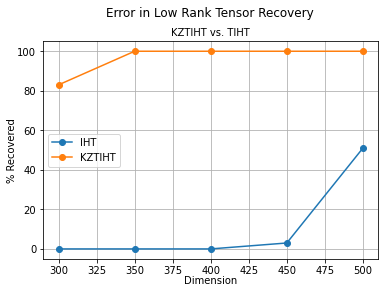

In [35]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]

plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot([300,350,400,450,500], data_1[0::2],'-o', label = "IHT")
plt.plot([300,350,400,450,500], data_1[1::2],'-o', label = "KZTIHT")

title_string = "Error in Low Rank Tensor Recovery"
subtitle_string = "KZTIHT vs. TIHT"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.xlabel(xlabel="Dimension",labelpad = 0)
plt.ylabel(ylabel="% Recovered",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/KZIHT VS. TIHT_rec.png', dpi=300,  bbox_inches="tight")

In [ ]:
########################################
### Putting all the plots together #####
########################################



### KZTIHT vs. TIHT Recovery using Gaussian mx. for fixed rank and varying target dimension w/ step size

In [11]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Percentage Recovered
## w/ step-size

cols = []
data = []

itr = 500
num_samples = 100
j = 0

n = 1000
n_dim = [10,10,10]
r = [3,3,3]

mu_1 = [0.2,0.5,0.7,0.7,0.7,0.8]
mu_2 = [0.4,0.7,0.8,0.8,1,1.1]

k = 0

for m in [150,200,250,300,350,400]:
    
    rec_IHT = 0
    rec_KZIHT = 0
    cols = cols + ['iht'+str(m), 'kziht'+str(m)]
    print(m)
        
    for samples in range(num_samples):
        
        #print(samples)
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu_2[k]*n/m, itr = itr)
        
        if np.linalg.norm(A@(vectorize_tl(y_IHT))-b) < 0.001:
            rec_IHT = rec_IHT + 1 
        if np.linalg.norm(A@(y_KZIHT)-b) < 0.001:
            rec_KZIHT = rec_KZIHT + 1 
        
    data = data + [rec_IHT,rec_KZIHT]
    k = k+1
    
data = np.array(data)[...,None]
data = pd.DataFrame(data.T,columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_step.csv', header = True)

150
200
250
300
350
400


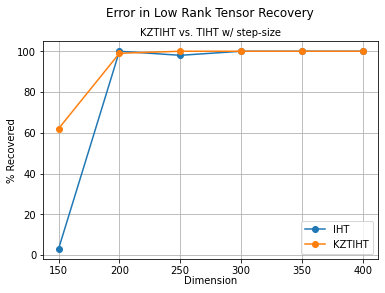

In [33]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_step.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]

plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot([150,200,250,300,350,400], data_1[0::2],'-o', label = "IHT")
plt.plot([150,200,250,300,350,400], data_1[1::2],'-o', label = "KZTIHT")

title_string = "Error in Low Rank Tensor Recovery"
subtitle_string = "KZTIHT vs. TIHT w/ step-size"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.xlabel(xlabel="Dimension",labelpad = 0)
plt.ylabel(ylabel="% Recovered",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/KZIHT VS. TIHT_rec_step.png', dpi=300,  bbox_inches="tight")

### Database Friendly Measurement Mx.

### Mode-wise Mx. *Doesn't seem to converge for step sizes from 0.1 to 0.6 for both TIHT and KZTIHT*

In [16]:
###################################
### Recovering Tensors via KZIHT ##
### DB Friendly measurements ######
###################################


cols = []
data = []

itr = 250
num_samples = 2
j = 0

n = 8000
n_dim = [20,20,20]
r = [1,1,1]

for m in [18,17]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + [ 'iht'+str(m),'kziht'+str(m)]
    
    print(m)
        
    for samples in range(num_samples):
        
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        
        A_1 = np.random.normal(0.0,1.0,(m,n_dim[0]))
        A_2 = np.random.normal(0.0,1.0,(m,n_dim[1]))
        A_3 = np.random.normal(0.0,1.0,(m,n_dim[2]))

        A = np.kron(np.kron(A_1,A_2),A_3)
        b = A@x
        
        #y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=0.1/(m^3),itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = 0.6*n/(m^3), itr = itr)
        #avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:      
        data = np.concatenate(([avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_mdw.csv', header = True)


18


/var/folders/1m/d1lrmr2n7gvdmlys8cnm3nt40000gn/T/ipykernel_65482/3959845617.py:18: RuntimeWarning: overflow encountered in double_scalars
  y = y + gamma*(b[t[j]] - a@y)*a/(np.linalg.norm(a)**2)
/var/folders/1m/d1lrmr2n7gvdmlys8cnm3nt40000gn/T/ipykernel_65482/3959845617.py:18: RuntimeWarning: invalid value encountered in matmul
  y = y + gamma*(b[t[j]] - a@y)*a/(np.linalg.norm(a)**2)


LinAlgError: SVD did not converge

### Row-wise Gaussian Kroneckered Mx.

#### KZTIHT vs. TIHT for row-wise Kroncekered mx. sans step-size

In [13]:
## Considering 10*10*10 tensors
## Errorless Recovery
## Gaussian Measurement Matrices  

cols = []
data = []

itr = 100
num_samples = 20
j = 0

n = 1000
n_dim = [10,10,10]
m = 600

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):

        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)

        A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
        A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
        A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
        A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
        A = A_4.T
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = n/m, itr = itr)
        
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_kron.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


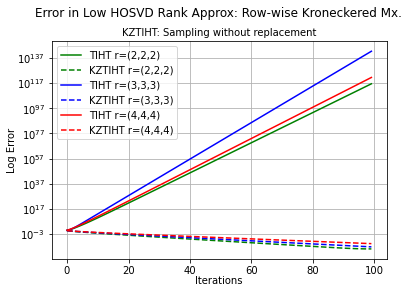

In [14]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_kron.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "KZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "KZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "KZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx: Row-wise Kroneckered Mx."
subtitle_string = "KZTIHT: Sampling without replacement"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/KZIHT VS. TIHT_kron.png', dpi=300,  bbox_inches="tight")

#### KZTIHT vs. TIHT for row-wise Kroncekered mx. with step-size

In [17]:
## Considering 10*10*10 tensors
## Errorless Recovery
## Gaussian Measurement Matrices  

cols = []
data = []

itr = 150
num_samples = 20
j = 0

n = 1000
n_dim = [10,10,10]
m = 600

k = 0
mu_1 = [0.1,0.1,0.1]
mu_2 = [1.4,1.4,1.4]

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):

        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)

        A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
        A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
        A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
        A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
        A = A_4.T
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = mu_2[k]*n/m, itr = itr)
        
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_kron_step.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


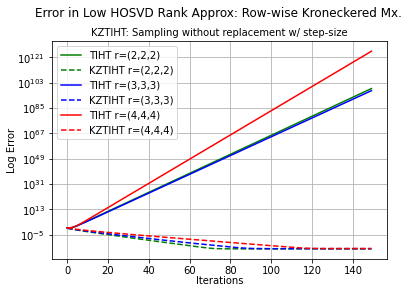

In [16]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_rec_kron_step.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "KZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "KZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "KZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx: Row-wise Kroneckered Mx."
subtitle_string = "KZTIHT: Sampling without replacement w/ step-size"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/KZIHT VS. TIHT_kron_step.png', dpi=300,  bbox_inches="tight")

### KZTIHT vs. TIHT Recovery using Row-wise Kroneckered structured mx. for fixed rank and varying target dimension. Step-size used for TIHT

In [31]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Percentage Recovered

cols = []
data = []

itr = 500
num_samples = 100
j = 0

n = 1000
n_dim = [10,10,10]
r = [3,3,3]
mu_1 = [0.05,0.05,0.1,0.1,0.2]
k = 0

for m in [300,350,400,450,500]:
    
    rec_IHT = 0
    rec_KZIHT = 0
    cols = cols + ['iht'+str(m), 'kziht'+str(m)]
    print(m)
        
    for samples in range(num_samples):
        
        #print(samples)
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
        A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
        A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
        A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
        A = A_4.T
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = KZIHT_HOSVD_RR(A,b,X,n,r,gamma = n/m, itr = itr)
        
        if np.linalg.norm(A@(vectorize_tl(y_IHT))-b) < 0.001:
            rec_IHT = rec_IHT + 1 
        if np.linalg.norm(A@(y_KZIHT)-b) < 0.001:
            rec_KZIHT = rec_KZIHT + 1 
        
    data = data + [rec_IHT,rec_KZIHT]
    k = k+1
    
data = np.array(data)[...,None]
data = pd.DataFrame(data.T,columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_kron_rec.csv', header = True)

300
350
400
450
500


/Users/shambhavi/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/shambhavi/opt/anaconda3/lib/python3.9/site-packages/tensorly/backend/core.py:712: RuntimeWarning: overflow encountered in square
  return self.sqrt(self.sum(self.abs(tensor) ** 2, axis=axis))
/Users/shambhavi/opt/anaconda3/lib/python3.9/site-packages/tensorly/decomposition/_tucker.py:200: RuntimeWarning: invalid value encountered in double_scalars
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor


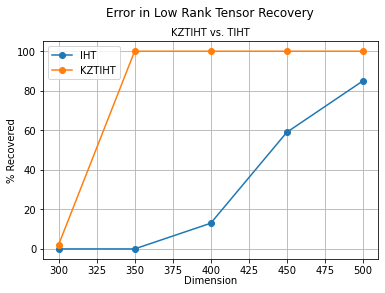

In [34]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/kztiht_kron_rec.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]

plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot([300,350,400,450,500], data_1[0::2],'-o', label = "IHT")
plt.plot([300,350,400,450,500], data_1[1::2],'-o', label = "KZTIHT")

title_string = "Error in Low Rank Tensor Recovery"
subtitle_string = "KZTIHT vs. TIHT"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.xlabel(xlabel="Dimension",labelpad = 0)
plt.ylabel(ylabel="% Recovered",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/KZIHT VS. TIHT_rec_kron.png', dpi=300,  bbox_inches="tight")

#### Adaptive KZTIHT Analysis 

### AKZTIHT vs. TIHT Recovery using Gaussian mx. for fixed target dimension varying rank

In [47]:
## AKZTIHT for Gaussian Measurement Matrices 

cols = []
data = []
itr = 250
num_samples = 20
j = 0
n = 1000
n_dim = [10,10,10]
m = 600

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):
        
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=1/m,itr = itr)
        y_KZIHT, error_KZIHT = TIHT_HOSVD_proj(A,b,X,r,lamda=1/m,itr = itr,num= 20)
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 
data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/AKZTIHT_vs_TIHT_err.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


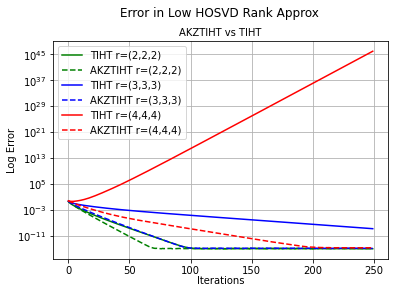

In [48]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/AKZTIHT_vs_TIHT_err.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "AKZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "AKZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "AKZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx"
subtitle_string = "AKZTIHT vs TIHT"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/AKZIHT VS. TIHT_new.png', dpi=300,  bbox_inches="tight")

In [69]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Step-size = 1

cols = []
data = []
itr = 150
num_samples = 20
j = 0
n = 1000
n_dim = [10,10,10]
m = 600

mu_1 = [0.9,0.8,0.8]
mu_2 = [1,1,1]
k=0

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):
        
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A = gaussian_mx(m,n)
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = TIHT_HOSVD_proj(A,b,X,r,lamda=mu_2[k]*1/m,itr = itr,num= 20)
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 
    k = k+1

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/AKZTIHT_vs_TIHT_err_step.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


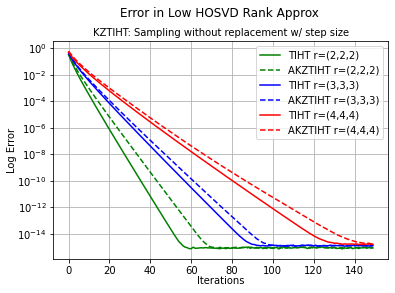

In [70]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/AKZTIHT_vs_TIHT_err_step.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

itr = 150
plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "AKZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "AKZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "AKZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx"
subtitle_string = "Fixed clipping"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/Step AKZTIHT VS TIHT.png', dpi=300,  bbox_inches="tight")

In [66]:
cols = []
data = []

itr = 150
num_samples = 2
j = 0

n = 1000
n_dim = [10,10,10]
m = 600

k = 0
mu_1 = [0.1,0.1,0.1]
mu_2 = [1,0.8,0.8]

for r in [[2,2,2],[3,3,3],[4,4,4]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):

        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)

        A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
        A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
        A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
        A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
        A = A_4.T
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = TIHT_HOSVD_proj(A,b,X,r,lamda=mu_2[k]*1/m,itr = itr,num= 20)
        
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/akztiht_rec_kron_step.csv', header = True)

[2, 2, 2]
[3, 3, 3]
[4, 4, 4]


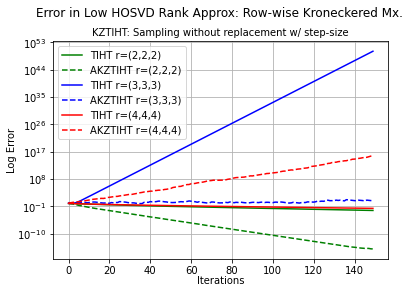

In [67]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/akztiht_rec_kron_step.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(2,2,2)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "AKZTIHT r=(2,2,2)",linestyle = '--', color = "green")

plt.plot(range(itr), data_1[:,2],  label= "TIHT r=(3,3,3)", color = "blue")
plt.plot(range(itr), data_1[:,3],label= "AKZTIHT r=(3,3,3)",linestyle = '--', color = "blue")

plt.plot(range(itr), data_1[:,4],  label= "TIHT r=(4,4,4)", color = "red")
plt.plot(range(itr), data_1[:,5],label= "AKZTIHT r=(4,4,4)",linestyle = '--', color = "red")

title_string = "Error in Low HOSVD Rank Approx: Row-wise Kroneckered Mx."
subtitle_string = "KZTIHT: Sampling without replacement w/ step-size"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/AKZIHT VS. TIHT_kron_step.png', dpi=300,  bbox_inches="tight")

In [82]:
## KZTIHT sampling w/ replacement
## Gaussian Measurement Matrices 
## Percentage Recovered

cols = []
data = []

itr = 500
num_samples = 100
j = 0

n = 1000
n_dim = [10,10,10]
r = [2,2,2]
mu_1 = [0.1,0.1,0.2]
k = 0

for m in [400,450,500]:
    
    rec_IHT = 0
    rec_KZIHT = 0
    cols = cols + ['iht'+str(m), 'kziht'+str(m)]
    print(m)
        
    for samples in range(num_samples):
        
        #print(samples)
        X = random_low_rank_HOSVD(n_dim,r)
        x = vectorize_np(X)
        A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
        A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
        A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
        A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
        A = A_4.T
        b = A@x 
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = TIHT_HOSVD_proj(A,b,X,r,lamda=1/m,itr = itr,num= 20)
        
        if np.linalg.norm(A@(vectorize_tl(y_IHT))-b) < 0.001:
            rec_IHT = rec_IHT + 1 
        if np.linalg.norm(A@vectorize_tl(y_KZIHT)-b) < 0.001:
            rec_KZIHT = rec_KZIHT + 1 
        
    data = data + [rec_IHT,rec_KZIHT]
    k = k+1
    
data = np.array(data)[...,None]
data = pd.DataFrame(data.T,columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/akztiht_kron_rec.csv', header = True)

400
450
500


/Users/shambhavi/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/shambhavi/opt/anaconda3/lib/python3.9/site-packages/tensorly/backend/core.py:712: RuntimeWarning: overflow encountered in square
  return self.sqrt(self.sum(self.abs(tensor) ** 2, axis=axis))
/Users/shambhavi/opt/anaconda3/lib/python3.9/site-packages/tensorly/decomposition/_tucker.py:200: RuntimeWarning: invalid value encountered in double_scalars
  rec_error = sqrt(abs(norm_tensor**2 - tl.norm(core, 2) ** 2)) / norm_tensor


KeyboardInterrupt: 

In [ ]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/akztiht_kron_rec.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))[0]

plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot([400,450,500], data_1[0::2],'-o', label = "TIHT")
plt.plot([400,450,500], data_1[1::2],'-o', label = "AKZTIHT")

title_string = "Error in Low Rank Tensor Recovery"
subtitle_string = "AKZTIHT vs. TIHT"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.xlabel(xlabel="Dimension",labelpad = 0)
plt.ylabel(ylabel="% Recovered",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/AKZIHT VS. TIHT_rec_kron.png', dpi=300,  bbox_inches="tight")

  ### Adversarial example

In [93]:
cols = []
data = []

itr = 1000
num_samples = 2
j = 0

n = 1000
n_dim = [10,10,10]
m = 600

k = 0
mu_1 = [0.1]
mu_2 = [1]

for r in [[1,1,1]]:
    
    avg_err_IHT = np.zeros(itr)
    avg_err_KZIHT = np.zeros(itr)
    cols = cols + ['iht'+str(r[0]), 'kziht'+str(r[0])]
    
    print(r)
        
    for samples in range(num_samples):

        A_1 = np.random.normal(0.0,1.0,(n_dim[0],m))
        A_2 = np.random.normal(0.0,1.0,(n_dim[1],m))
        A_3 = np.random.normal(0.0,1.0,(n_dim[2],m))
        A_4 = linalg.khatri_rao(A_1,linalg.khatri_rao(A_2,A_3))
        A = A_4.T
        x = A[0,:]
        X = np.reshape(x,(10,10,10))
        b = A@x 
        
        y_IHT,error_IHT = TIHT_HOSVD(A,b,X,r,lamda=mu_1[k]*1/m,itr = itr)
        y_KZIHT, error_KZIHT = TIHT_HOSVD_proj(A,b,X,r,lamda=mu_2[k]*1/m,itr = itr,num= 25)
        
        avg_err_IHT = avg_err_IHT + error_IHT
        avg_err_KZIHT = avg_err_KZIHT + error_KZIHT
        
    if j == 0:
        
        data = np.concatenate(([avg_err_IHT/num_samples],[avg_err_KZIHT/num_samples]), axis = 0).T
        j = j + 1
    
    else:
        
        data = np.concatenate((data, np.array([avg_err_IHT/num_samples]).T),axis=1)
        data = np.concatenate((data, np.array([avg_err_KZIHT/num_samples]).T),axis=1) 

data = pd.DataFrame(data, columns = cols)
data.to_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/akztiht_rec_kron_adv.csv', header = True)

[1, 1, 1]


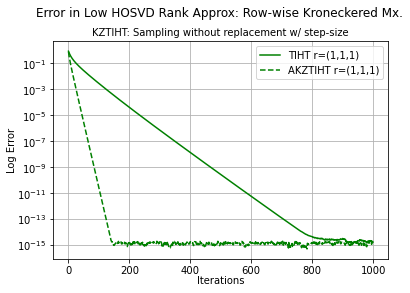

In [94]:
data_1 = pd.read_csv('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Files/akztiht_rec_kron_adv.csv')
data_1 = np.array(data_1.drop(data_1.columns[0],axis = 1))
plt.figure()
plt.title("", pad = 30, loc = "center")

plt.plot(range(itr), data_1[:,0],  label= "TIHT r=(1,1,1)", color = "green")
plt.plot(range(itr), data_1[:,1],label= "AKZTIHT r=(1,1,1)",linestyle = '--', color = "green")

title_string = "Error in Low HOSVD Rank Approx: Row-wise Kroneckered Mx."
subtitle_string = "KZTIHT: Sampling without replacement w/ step-size"

plt.suptitle(title_string, y=1, x = 0.51, fontsize=12)
plt.title(subtitle_string, x = 0.5, fontsize=10)

plt.legend()
plt.yscale("log")
plt.xlabel(xlabel="Iterations",labelpad = 0)
plt.ylabel(ylabel="Log Error",labelpad = 0)
plt.grid()
plt.savefig('/Users/shambhavi/Desktop/Academic/KZ+IHT/Code/KZTIHT Code Files/Images/AKZIHT VS. TIHT_kron_adv.png', dpi=300,  bbox_inches="tight")